In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Titanic dataset
df = pd.read_csv("data/titanic_feats.csv")
df.head()
X = df.drop(columns=["y"])
y = df['y']


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 12) (179, 12) (712,) (179,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

models = {
    "logis": LogisticRegression(C=10,solver="lbfgs"),
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="poly",gamma="auto", max_iter=200),cv=3),
    "randomforest": RandomForestClassifier(n_estimators=300)
}


In [14]:
# Train all the models in the models dict
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Training logis...
Training svm-linear...
Training svm-rbf...
Training randomforest...


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3

Train complete


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred))
    printMetric("Recall",recall_score(y_test, y_pred))
    printMetric("F1Score",f1_score(y_test, y_pred))

Evaluating model logis
	 Accuracy: 0.81
	 Precision: 0.714
	 Recall: 0.738
	 F1Score: 0.726
Evaluating model svm-linear
	 Accuracy: 0.821
	 Precision: 0.854
	 Recall: 0.574
	 F1Score: 0.686
Evaluating model svm-rbf
	 Accuracy: 0.659
	 Precision: 0.0
	 Recall: 0.0
	 F1Score: 0.0
Evaluating model randomforest
	 Accuracy: 0.793
	 Precision: 0.694
	 Recall: 0.705
	 F1Score: 0.699


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
from sklearn import metrics
import numpy as np



y_scores = models["logis"].predict_proba(X_test)[:,1]

# Extract AUC score
auc = metrics.roc_auc_score(y_test, y_scores)

# Extract ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=1)

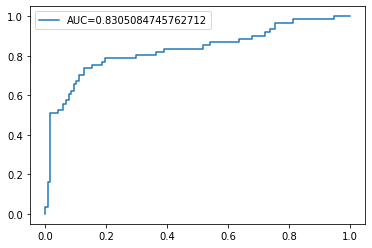

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.legend([f"AUC={auc}"])

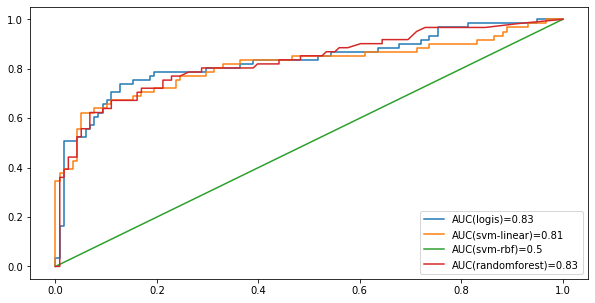

In [19]:
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
aucs = []
for name, model in models.items():
    y_scores = model.predict_proba(X_test)
    
    alive_scores = y_scores[:,1]
    
    # Extract AUC score
    auc = roc_auc_score(y_test, alive_scores)
    aucs.append(f"AUC({name})={round(auc,2)}")
    # Extract ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, alive_scores, pos_label=1)
    plt.plot(fpr,tpr)

plt.legend(aucs)

In [20]:
import numpy as np
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f"({name}) acccuracy={np.mean(scores)}")

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

(logis) acccuracy=0.7923544433094994


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(svm-linear) acccuracy=0.7114884803087049


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:455: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler o

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:455: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler o

(svm-rbf) acccuracy=0.45436670071501534
(randomforest) acccuracy=0.8047769833163091


In [21]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"MODEL -> {name}")
    print(classification_report(y_test,y_pred))

MODEL -> logis
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       118
           1       0.71      0.74      0.73        61

   micro avg       0.81      0.81      0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

MODEL -> svm-linear
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       118
           1       0.85      0.57      0.69        61

   micro avg       0.82      0.82      0.82       179
   macro avg       0.83      0.76      0.78       179
weighted avg       0.83      0.82      0.81       179

MODEL -> svm-rbf
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       118
           1       0.00      0.00      0.00        61

   micro avg       0.66      0.66      0.66       179
   macro avg       0.33      0.50      0.40       179
weighted avg       0.4

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
